# Singlet Polarization

Here we test Poke's ability to model the polarization aberration from a refractive element. There is generally a lack of accessible Jones pupils for us to compare to, so in this example we compare PRT pupils to those simulated by Zemax using a macro supplied by John Krist. 

In [1]:
from poke.poke_core import Rayfront
from poke.poke_math import np
import poke.plotting as plot

pth_to_lens = 'C:/Users/Work/Desktop/poke/experiments/physics_validation/singlet.zmx'

# rayfront parameters
number_of_rays = 20 # across the entrance pupil
wavelength = 0.6e-6
pupil_radius = 50/2 # semi-aperture of lens
max_field_of_view = 1 # degrees

rf_zmx= Rayfront(number_of_rays, wavelength, pupil_radius, max_field_of_view, circle=False)

norm fov =  [0. 0.]
base ray shape  (4, 400)


C:\Users\Work\Desktop\poke\poke\raytrace.py:65: SyntaxWarning: invalid escape sequence '\R'
  dll = os.path.dirname(__file__) + "\RayTrace.dll"


In [2]:
n_air = 1.
n_glass = 1.5

n_front = (n_air, n_glass)
n_rear = (n_glass, n_air)

front = {"surf": 2, "coating": n_front, "mode": "transmit"}
rear = {"surf": 3, "coating": n_rear, "mode": "transmit"}
rf_zmx.as_polarized([front, rear])

In [3]:
import zosapi
zosapi.App()
rf_zmx.trace_rayset(pth_to_lens)

tracing with global coordinates
tracing with global coordinates
1 Raysets traced through 2 surfaces


In [4]:
rf_zmx.compute_jones_pupil()

# Plotting the PRT Pupil

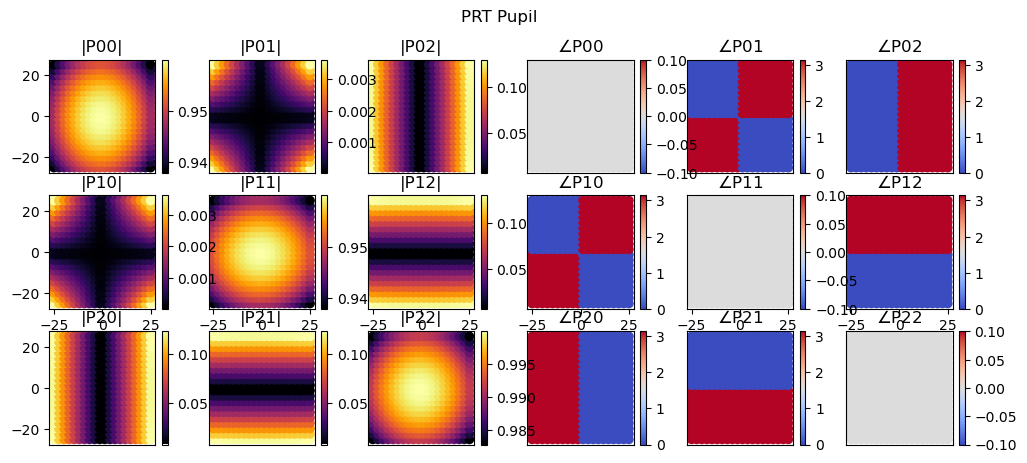

In [5]:
plot.prt_pupil(rf_zmx)

# Compare to data from John Krist's macro

In [6]:
parent_pth = 'C:/Users/Work/Desktop/poke/experiments/physics_validation/'

xpol = np.genfromtxt(parent_pth+'singlet__xin_600nm.txt', skip_header=1).T
ypol = np.genfromtxt(parent_pth+'singlet__yin_600nm.txt', skip_header=1).T
x, y = xpol[0], xpol[1]

Exx = xpol[2] + 1j*xpol[3]
Eyx = xpol[4] + 1j*xpol[5]
Ezx = xpol[6] + 1j*xpol[7]
Exy = ypol[2] + 1j*ypol[3]
Eyy = ypol[4] + 1j*ypol[5]
Ezy = ypol[6] + 1j*ypol[7]
J_zmx = np.array([[Exx, Exy],[Eyx, Eyy]])
print(J_zmx.shape)
print(rf_zmx.jones_pupil[-1].shape)

(2, 2, 373)
(400, 3, 3)


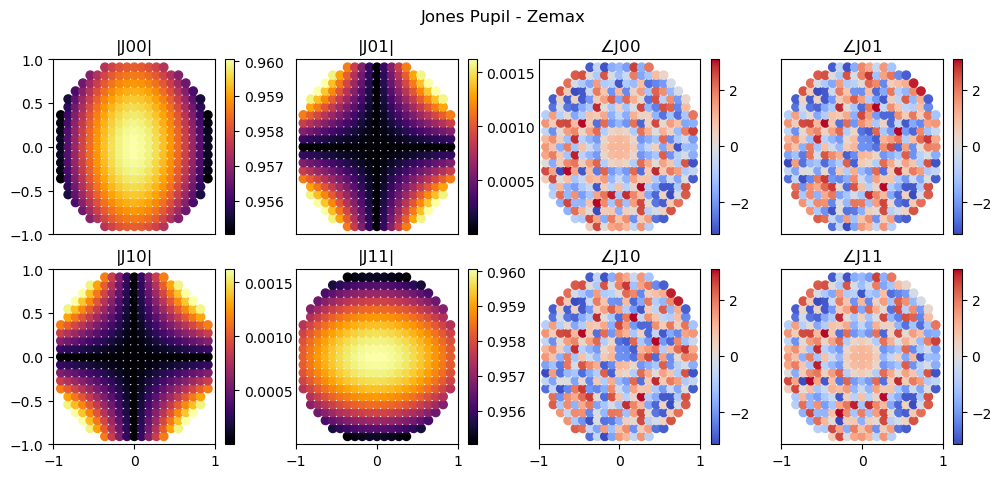

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=[12, 5], nrows=2, ncols=4)
plt.suptitle("Jones Pupil - Zemax")
for j in range(2):
    for k in range(2):
        ax = axs[j, k]
        ax.set_title("|J{j}{k}|".format(j=j, k=k))
        sca = ax.scatter(x, y, c=np.abs(J_zmx[j, k]), cmap="inferno")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)
        if k != 0:
            ax.yaxis.set_visible(False)

# theres a phase offset
offset = 0

for j in range(2):
    for k in range(2):

        if k == 1:
            if j == 0:
                offset = np.pi
        else:
            offset = 0
        ax = axs[j, k + 2]
        ax.set_title(r"$\angle$" + "J{j}{k}".format(j=j, k=k))
        sca = ax.scatter(x, y, c=np.angle(J_zmx[j, k]), cmap="coolwarm")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)

        ax.yaxis.set_visible(False)
plt.show()

In [8]:
# import matplotlib.pyplot as plt

# fig, axs = plt.subplots(figsize=[12, 5], nrows=2, ncols=4)
# plt.suptitle("Jones Pupil - Difference")
# for j in range(2):
#     for k in range(2):
#         ax = axs[j, k]
#         ax.set_title("|J{j}{k}|".format(j=j, k=k))
#         sca = ax.scatter(x, y, c=np.abs(J_zmx[j, k]) - np.abs(rf_zmx.P_total[-1][...,j,k]), cmap="inferno")
#         fig.colorbar(sca, ax=ax)

#         # turn off the ticks
#         if j != 1:
#             ax.xaxis.set_visible(False)
#         if k != 0:
#             ax.yaxis.set_visible(False)

# # theres a phase offset
# offset = 0

# for j in range(2):
#     for k in range(2):

#         if k == 1:
#             if j == 0:
#                 offset = np.pi
#         else:
#             offset = 0
#         ax = axs[j, k + 2]
#         ax.set_title(r"$\angle$" + "J{j}{k}".format(j=j, k=k))
#         sca = ax.scatter(x, y, c=np.angle(J_zmx[j, k]), cmap="coolwarm")
#         fig.colorbar(sca, ax=ax)

#         # turn off the ticks
#         if j != 1:
#             ax.xaxis.set_visible(False)

#         ax.yaxis.set_visible(False)
# plt.show()

The PRT Pupil certainly appears to match, but it's hard to find a Jones pupil comparison to make sure that the local coordinate transformation isn't messing up the result. Below we plot the Jones pupil with the off-diagonal elements to find that the elements that should be zero are only _near_ zero.

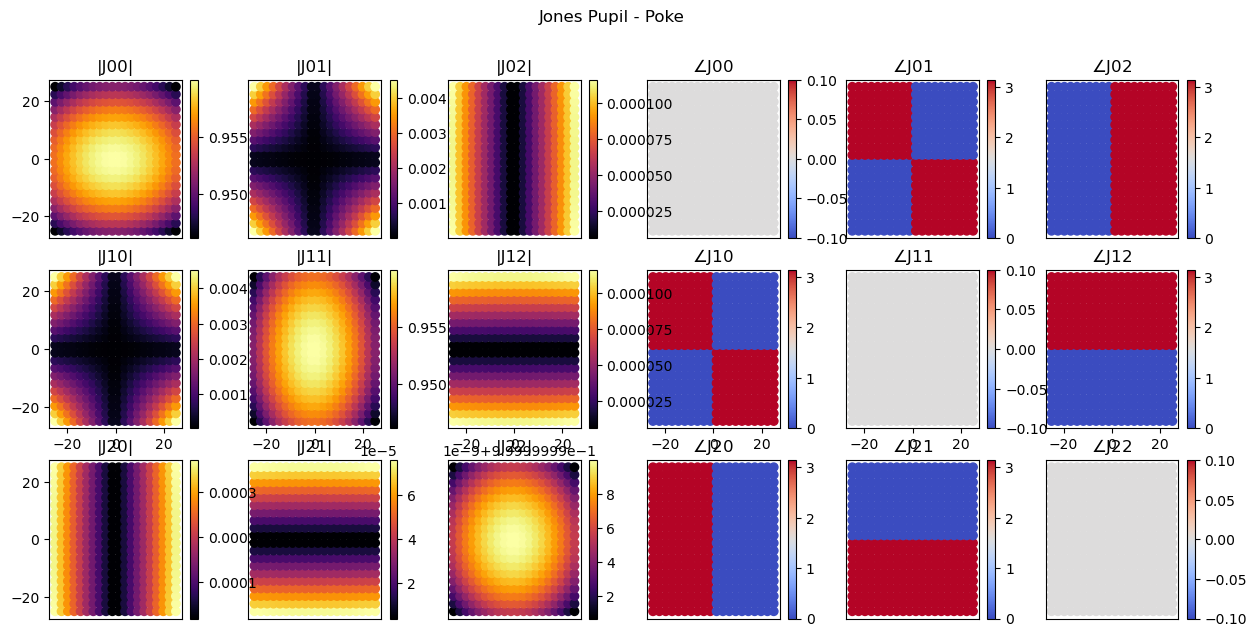

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=[15, 7], nrows=3, ncols=6)
plt.suptitle("Jones Pupil - Poke")
for j in range(3):
    for k in range(3):
        ax = axs[j, k]
        ax.set_title("|J{j}{k}|".format(j=j, k=k))
        sca = ax.scatter(rf_zmx.xData[0,0], rf_zmx.yData[0,0], c=np.abs(rf_zmx.jones_pupil[-1][...,j, k]), cmap="inferno")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)
        if k != 0:
            ax.yaxis.set_visible(False)

# theres a phase offset
offset = 0

for j in range(3):
    for k in range(3):

        if k == 1:
            if j == 0:
                offset = np.pi
        else:
            offset = 0
        ax = axs[j, k + 3]
        ax.set_title(r"$\angle$" + "J{j}{k}".format(j=j, k=k))
        sca = ax.scatter(rf_zmx.xData[0,0], rf_zmx.yData[0,0], c=np.angle(rf_zmx.jones_pupil[-1][...,j, k]), cmap="coolwarm")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks 
        if j != 1:
            ax.xaxis.set_visible(False)

        ax.yaxis.set_visible(False)
plt.show()

Furthermore, the on-diagonal amplitude patterns J00 and J11 appear to have switched. I'm not sure how real this is. Based on looking at the Fresnel coefficients, I would expect a pattern more like the Jones pupil and not the PRT matrix. These two simulations indicate that we are at least quite close.

C:\Users\Work\Desktop\poke\poke\polarization.py:56: RuntimeWarning: invalid value encountered in sqrt
  fs = (np.cos(aoi) - np.sqrt(n ** 2 - np.sin(aoi) ** 2)) / (
C:\Users\Work\Desktop\poke\poke\polarization.py:57: RuntimeWarning: invalid value encountered in sqrt
  np.cos(aoi) + np.sqrt(n ** 2 - np.sin(aoi) ** 2))
C:\Users\Work\Desktop\poke\poke\polarization.py:59: RuntimeWarning: invalid value encountered in sqrt
  fp = (n ** 2 * np.cos(aoi) - np.sqrt(n ** 2 - np.sin(aoi) ** 2)) / (
C:\Users\Work\Desktop\poke\poke\polarization.py:60: RuntimeWarning: invalid value encountered in sqrt
  n ** 2 * np.cos(aoi) + np.sqrt(n ** 2 - np.sin(aoi) ** 2))
C:\Users\Work\Desktop\poke\poke\polarization.py:64: RuntimeWarning: invalid value encountered in sqrt
  fs = (2 * np.cos(aoi)) / (np.cos(aoi) + np.sqrt(n ** 2 - np.sin(aoi) ** 2))
C:\Users\Work\Desktop\poke\poke\polarization.py:65: RuntimeWarning: invalid value encountered in sqrt
  fp = (2 * n * np.cos(aoi)) / (n ** 2 * np.cos(aoi) + np.sqrt(n

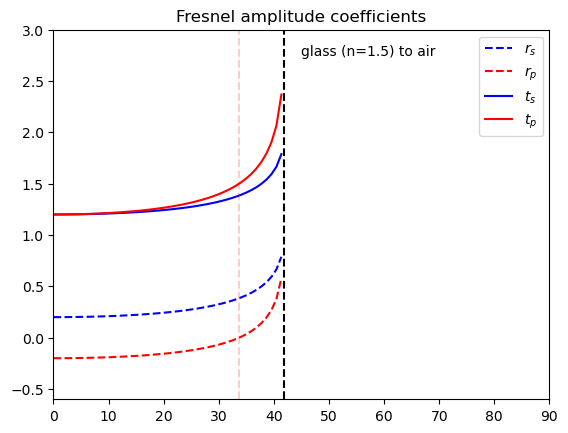

In [10]:
from poke.polarization import fresnel_coefficients
import matplotlib.pyplot as plt
angles = np.linspace(0, 89, 100)
rs, rp = fresnel_coefficients(np.radians(angles), n_glass, n_air, mode='reflect')
ts, tp = fresnel_coefficients(np.radians(angles), n_glass, n_air, mode='transmit')

def critical_angle(n1, n2):
    return np.arcsin(n2/n1)

def brewsters_angle(n1, n2):
    return np.arctan(n2/n1)

plt.figure()
plt.title('Fresnel amplitude coefficients')
plt.text(45, 2.75, 'glass (n=1.5) to air')
plt.plot(angles, rs, color='b', linestyle='dashed', label=r'$r_{s}$')
plt.plot(angles, rp, color='r', linestyle='dashed', label=r'$r_{p}$')

plt.plot(angles, ts, color='b', label=r'$t_{s}$')
plt.plot(angles, tp, color='r', label=r'$t_{p}$')
plt.vlines(np.degrees(critical_angle(n_glass, n_air)), -0.6, 3, color='black', linestyle='dashed')
plt.vlines(np.degrees(brewsters_angle(n_glass, n_air)), -0.6, 3, color='red', linestyle='dashed', alpha=0.2)
plt.ylim(-0.6,3)
plt.xlim(0, 90)
plt.legend()
plt.show()

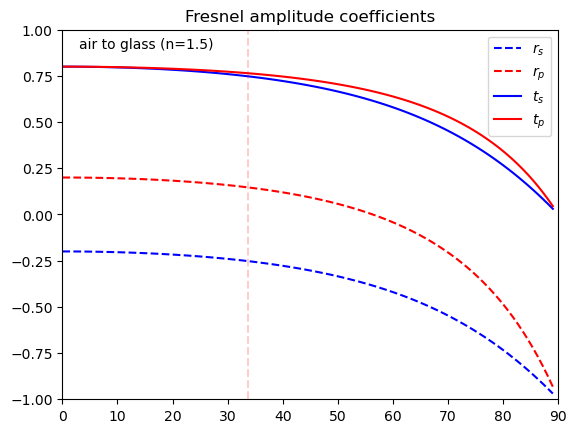

In [11]:
from poke.polarization import fresnel_coefficients
import matplotlib.pyplot as plt
angles = np.linspace(0, 89, 100)
rs, rp = fresnel_coefficients(np.radians(angles), n_air, n_glass, mode='reflect')
ts, tp = fresnel_coefficients(np.radians(angles), n_air, n_glass, mode='transmit')

def critical_angle(n1, n2):
    return np.arcsin(n2/n1)

def brewsters_angle(n1, n2):
    return np.arctan(n2/n1)

plt.figure()
plt.title('Fresnel amplitude coefficients')
plt.text(3, 0.9, 'air to glass (n=1.5)')
plt.plot(angles, rs, color='b', linestyle='dashed', label=r'$r_{s}$')
plt.plot(angles, rp, color='r', linestyle='dashed', label=r'$r_{p}$')

plt.plot(angles, ts, color='b', label=r'$t_{s}$')
plt.plot(angles, tp, color='r', label=r'$t_{p}$')
plt.vlines(np.degrees(brewsters_angle(n_glass, n_air)), -1, 1, color='red', linestyle='dashed', alpha=0.2)
plt.ylim(-1,1)
plt.xlim(0, 90)
plt.legend()
plt.show()

## A CODE V Comparison

We haven't tested refractive systems in CODE V yet. Here we recreate the above example to show that CODE V works. First we load up the CODE V simulated PRT data.

In [12]:
from poke.poke_core import Rayfront
from poke.poke_math import np

pth_to_lens = 'C:/Users/Work/Desktop/poke/experiments/physics_validation/singlet.len'

# rayfront parameters
number_of_rays = 20 # across the entrance pupil
wavelength = 0.6e-6
pupil_radius = 50 # semi-aperture of Hubble
max_field_of_view = 1 # degrees
nbk7 =  1.516800
front = {"surf": 2, "coating": (1., nbk7), "mode": "transmit"}
rear = {"surf": 3, "coating": (nbk7, 1.), "mode": "transmit"}

rf_cv = Rayfront(number_of_rays, wavelength, pupil_radius, max_field_of_view, circle=False)
rf_cv.as_polarized([front, rear])

norm fov =  [0. 0.]
base ray shape  (4, 400)


In [13]:
rf_cv.trace_rayset(pth_to_lens)

CODE V warning: Warning: Default recover file in use - writing to codev5592.rec 
res C:/Users/Work/Desktop/poke/experiments/physics_validation/singlet.len
CODE V warning: Warning: Buffer number 0 does not exist.  Nothing deleted. 
global coordinate reference set to surface 1
maxrays =  400
CODE V warning: Warning: Buffer number 1 does not exist.  Nothing deleted. 
1 Raysets traced through 2 surfaces


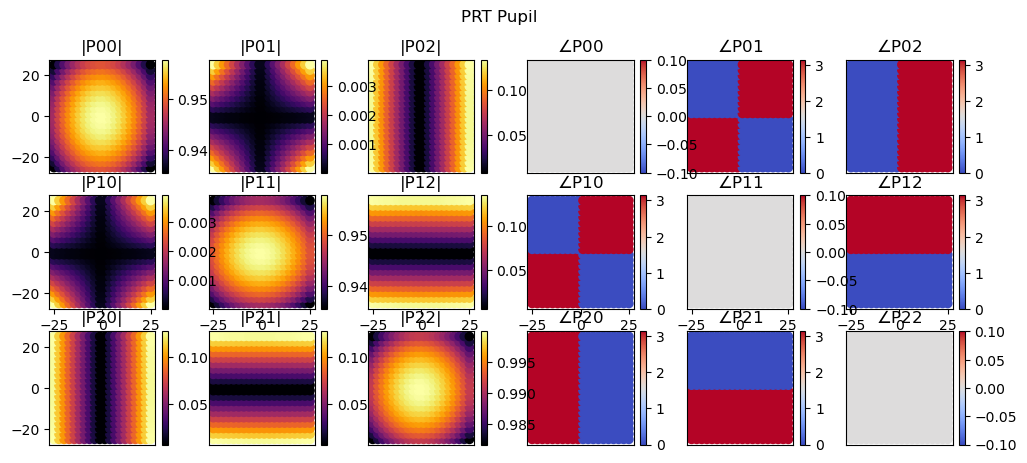

In [14]:
rf_cv.compute_jones_pupil(coordinates='double', collimated_object=False)
plot.prt_pupil(rf_cv)

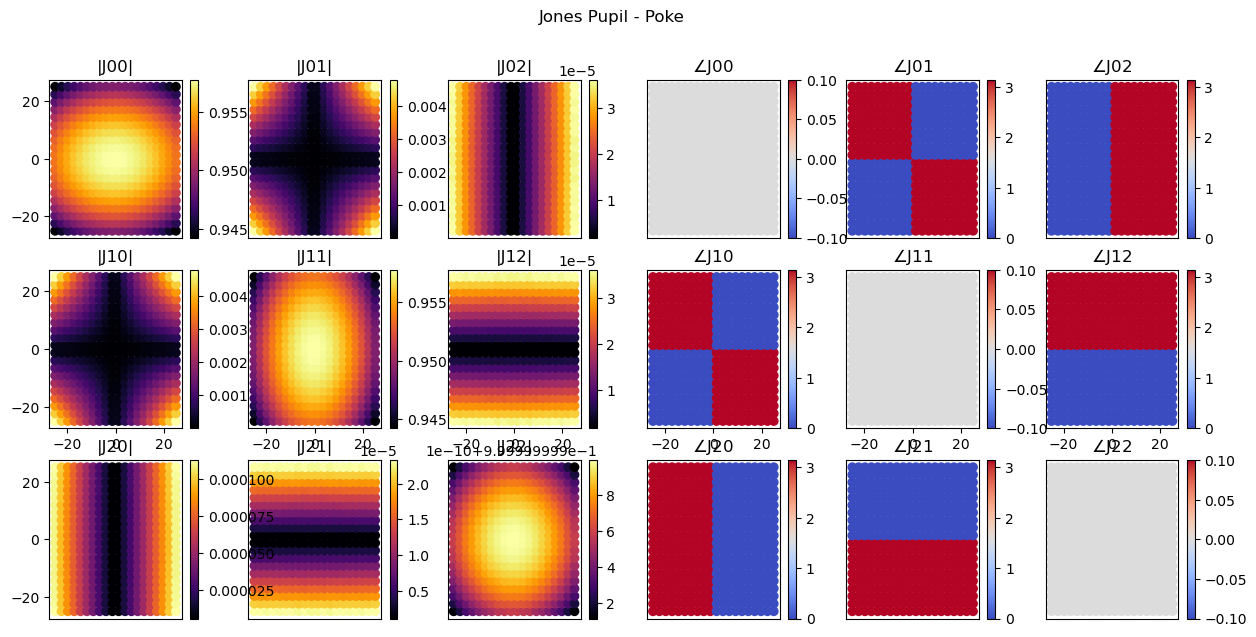

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=[15, 7], nrows=3, ncols=6)
plt.suptitle("Jones Pupil - Poke")
for j in range(3):
    for k in range(3):
        ax = axs[j, k]
        ax.set_title("|J{j}{k}|".format(j=j, k=k))
        sca = ax.scatter(rf_cv.xData[0,0], rf_cv.yData[0,0], c=np.abs(rf_cv.jones_pupil[-1][...,j, k]), cmap="inferno")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)
        if k != 0:
            ax.yaxis.set_visible(False)

# theres a phase offset
offset = 0

for j in range(3):
    for k in range(3):

        if k == 1:
            if j == 0:
                offset = np.pi
        else:
            offset = 0
        ax = axs[j, k + 3]
        ax.set_title(r"$\angle$" + "J{j}{k}".format(j=j, k=k))
        sca = ax.scatter(rf_cv.xData[0,0], rf_cv.yData[0,0], c=np.angle(rf_cv.jones_pupil[-1][...,j, k]), cmap="coolwarm")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks 
        if j != 1:
            ax.xaxis.set_visible(False)

        ax.yaxis.set_visible(False)
plt.show()

Next we compare to the CODE V simulated data

In [31]:
from poke.poke_math import np
pth = '../../experiments/physics_validation/polgrid_output_singlet.txt'
polgrid_data = np.genfromtxt(pth, delimiter=' ')

# jones matrix indices, see CODE V docs for the remaining rows
jxx_r = polgrid_data[20,1:]
jxx_i = polgrid_data[21,1:]
jxy_r = polgrid_data[22,1:]
jxy_i = polgrid_data[23,1:]
jyx_r = polgrid_data[24,1:]
jyx_i = polgrid_data[25,1:]
jyy_r = polgrid_data[26,1:]
jyy_i = polgrid_data[27,1:]

Jmat = np.zeros([jxx_r.shape[0], 2, 2], dtype=np.complex128)
Jmat[..., 0, 0] = jxx_r + 1j*jxx_i
Jmat[..., 0, 1] = jxy_r + 1j*jxy_i
Jmat[..., 1, 0] = jyx_r + 1j*jyx_i
Jmat[..., 1, 1] = jyy_r + 1j*jyy_i

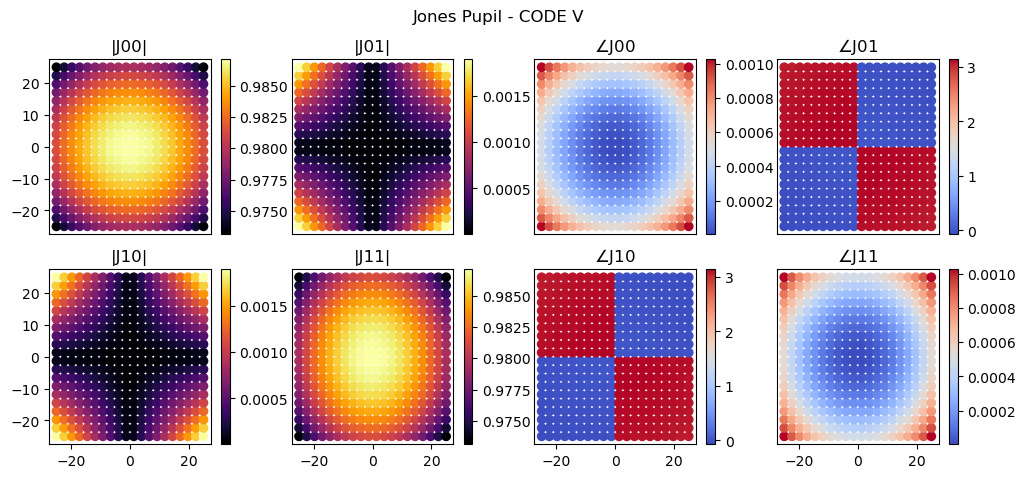

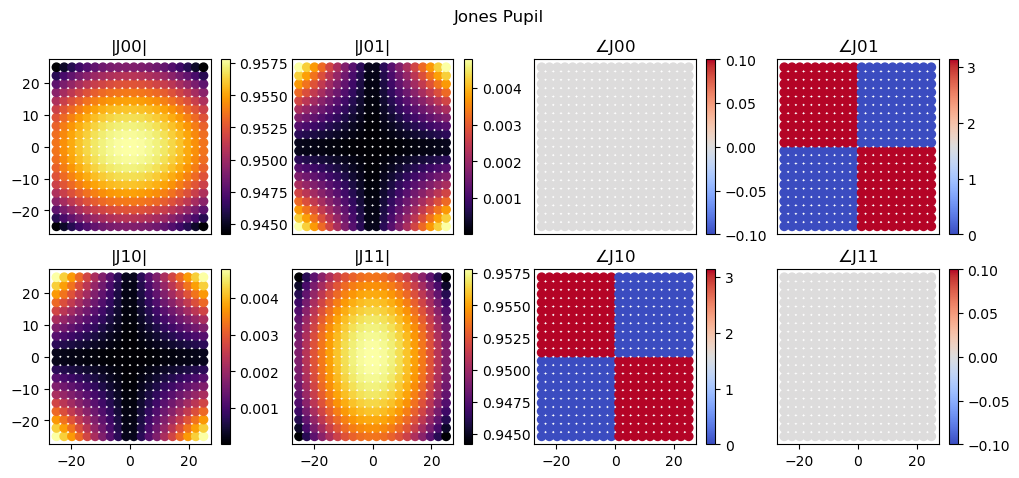

In [32]:
x, y = rf_cv.xData[0, 0], rf_cv.yData[0, 0]

fig, axs = plt.subplots(figsize=[12, 5], nrows=2, ncols=4)
plt.suptitle("Jones Pupil - CODE V")
for j in range(2):
    for k in range(2):
        ax = axs[j, k]
        ax.set_title("|J{j}{k}|".format(j=j, k=k))
        sca = ax.scatter(x, y, c=np.abs(Jmat[..., j, k]), cmap="inferno")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)
        if k != 0:
            ax.yaxis.set_visible(False)

# theres a phase offset
offset = 0

for j in range(2):
    for k in range(2):

        if j == 1:
            if k == 1:
                offset = 0
        ax = axs[j, k + 2]
        ax.set_title(r"$\angle$" + "J{j}{k}".format(j=j, k=k))
        sca = ax.scatter(x, y, c=np.angle(Jmat[..., j, k]) + offset, cmap="coolwarm")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)

        ax.yaxis.set_visible(False)
plt.show()
plot.jones_pupil(rf_cv)

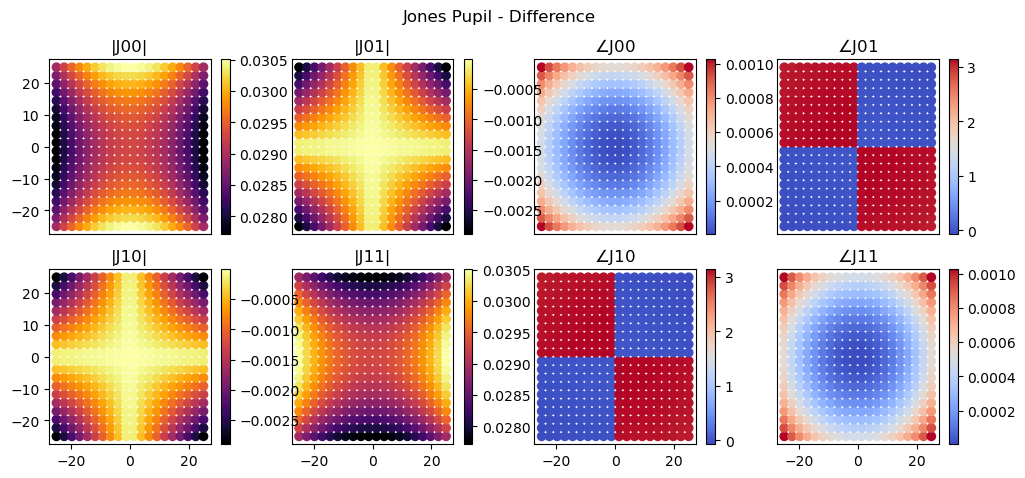

In [33]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=[12, 5], nrows=2, ncols=4)
plt.suptitle("Jones Pupil - Difference")
for j in range(2):
    for k in range(2):
        ax = axs[j, k]
        ax.set_title("|J{j}{k}|".format(j=j, k=k))
        sca = ax.scatter(x, y, c=np.abs(Jmat[..., j, k]) - np.abs(rf_cv.jones_pupil[-1][...,j,k]), cmap="inferno")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)
        if k != 0:
            ax.yaxis.set_visible(False)

# theres a phase offset
offset = 0

for j in range(2):
    for k in range(2):

        if k == 1:
            if j == 0:
                offset = np.pi
        else:
            offset = 0
        ax = axs[j, k + 2]
        ax.set_title(r"$\angle$" + "J{j}{k}".format(j=j, k=k))
        sca = ax.scatter(x, y, c=np.angle(Jmat[..., j, k]), cmap="coolwarm")
        fig.colorbar(sca, ax=ax)

        # turn off the ticks
        if j != 1:
            ax.xaxis.set_visible(False)

        ax.yaxis.set_visible(False)
plt.show()

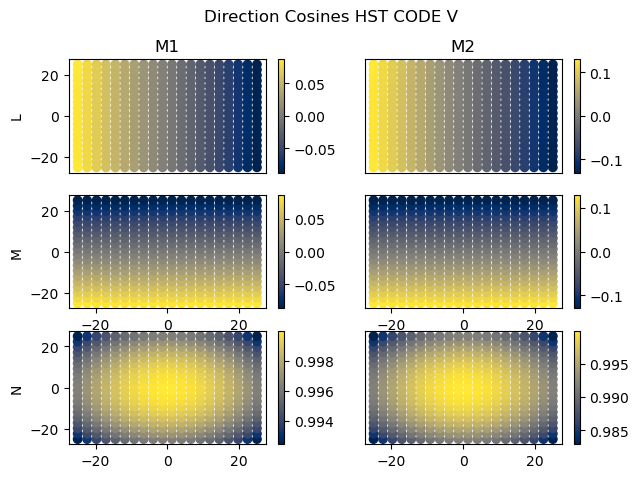

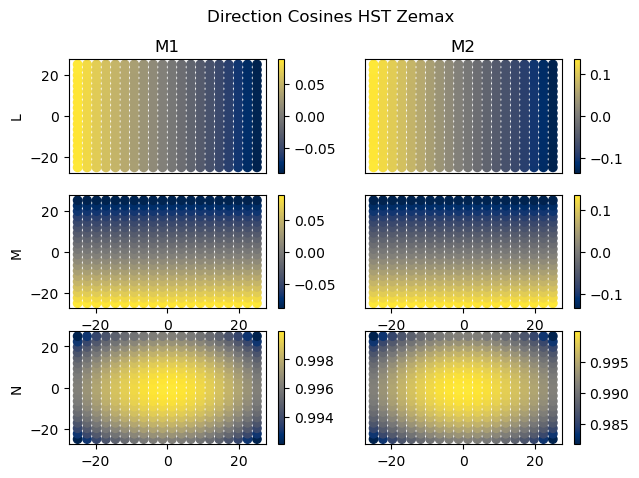

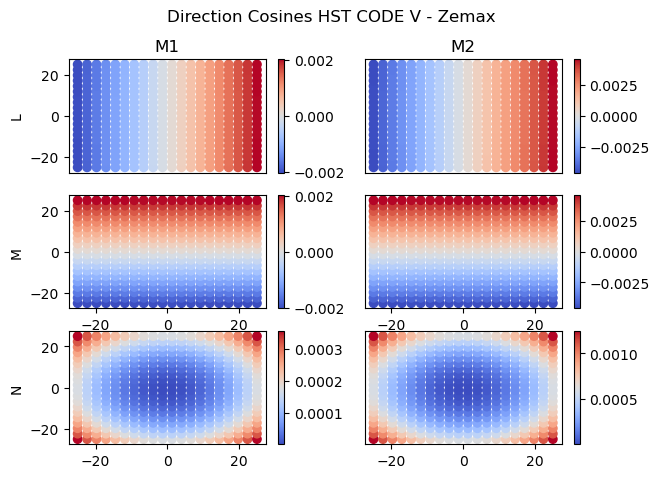

In [34]:
def plot_raydir(rf, rf2=None, code='Zemax', cmap='cividis'):
    fig, axs = plt.subplots(figsize=[7, 5], nrows=3, ncols=2)
    plt.suptitle(f"Direction Cosines HST {code}")
    for j in range(3):
        for k in range(2):
            
            ax = axs[j, k]

            if j == 0:
                if rf2 is None:
                    data = rf.lData[0, k]
                else:
                    data = rf.lData[0, k] - rf2.lData[0, k]
                ax.set_ylabel('L')
                ax.set_title(f'M{k+1}')

            elif j == 1:
                if rf2 is None:
                    data = rf.mData[0, k]
                else:
                    data = rf.mData[0, k] - rf2.mData[0, k]
                ax.set_ylabel('M')

            elif j == 2:
                if rf2 is None:
                    data = rf.nData[0, k]
                else:
                    data = rf.nData[0, k] - rf2.nData[0, k]
                ax.set_ylabel('N')

            sca = ax.scatter(x, y, c=data, cmap=cmap)
            fig.colorbar(sca, ax=ax)

            # clear interior axes
            if j < 1:
                ax.xaxis.set_visible(False)

            if k > 0:
                ax.yaxis.set_visible(False)

plot_raydir(rf_zmx, code='CODE V')
plot_raydir(rf_cv, code='Zemax')
plot_raydir(rf_zmx, rf2=rf_cv, code='CODE V - Zemax', cmap='coolwarm')